# Importación librerías

In [110]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Conexión MySQL

In [111]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()

Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025'].


C:\Users\crist\AppData\Local\Temp\ipykernel_2480\2366138512.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"


# Información general del Dataset

In [112]:
df = Tourist_Accommodation
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head(2)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,"Private bedroom in our attic apartment. Right in the heart of the pedestrian downtown area. Outstanding views from our large terrace and modern, fully renovated interior. Double bed in a fully renovated downtown attic. We live in a 1881 building in the heart of town. One minute away from the Picasso museum, Calle Larios and the cathedral. It is a 100 square meter apartment and a 45 square meter terrace with outstanding views of the cathedral and the whole downtown area and churches, plus an outdoor barbecue. The apartment underwent an 8 month renovation and is in pristine condition, with Italian appliances and light fixtures, Murano glass tiles and marble floors. The building has an elevator up to the 4ht floor and we live on the 5th. All of downtown M�laga is pedestrian, so you will be guaranteed no traffic noise and pleasant walks. There are hundreds of restaurants and shops in the neighborhood as well; impossible to run out of things to do. Common areas As often as our guests want",45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,"We have a quiet and sunny room with a good view in our 3 bedroom flat. In a welcoming atmosphere, our clean and respectful flatshare is located in a leafy neighbourhood with all facilities: shops, library, caf�s and bars, a swimming pools, gyms, and fantastic parks. Well connected by metro and bus with the centre: 15 minutes. For walks, we are also a 20 min stroll away from the riverside. I am living in a nice flat near the centre of Madrid (15 minutes by bus). We are relaxed, clean, and independent. The flat is located in a leafy neighbourhood with plenty of facilities: little shops, supermarkets, public library, swimming pools (covered and summer ones), tennis courts and free parking outside the flat. It is well connected by public transport (various bus and metro lines). The room is sunny and well presented. There are two bathrooms, one of which you would share with a guest. It has triple glazing and we provide fresh bedlinen and towels, so that packing is lighter for our guests. We",83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free parking on premises,Doorman,Elevator,Heating,Washer,First aid kit,Fire extinguisher,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Hot water,Bed linens,Extra pillows and blankets,Pocket wifi,Microwave,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020


Tamaño

In [113]:
df.shape

(10000, 35)

Tipos de datos

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   name                         9997 non-null   object 
 2   description                  9862 non-null   object 
 3   host_id                      10000 non-null  int64  
 4   neighbourhood_name           10000 non-null  object 
 5   neighbourhood_district       6079 non-null   object 
 6   room_type                    10000 non-null  object 
 7   accommodates                 10000 non-null  int64  
 8   bathrooms                    9926 non-null   object 
 9   bedrooms                     9930 non-null   object 
 10  beds                         9955 non-null   float64
 11  amenities_list               9983 non-null   object 
 12  price                        9746 non-null   float64
 13  minimum_nights   

Valores Nulos

In [115]:
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

# Limpieza y modificaciones para el rol de Marketing

In [116]:
# Lista de columnas a convertir en int pero si alguna de ellas tiene valor NaN pasará a 1, ya que todos los alohamientos tienen al menos una cama, una habitación y un baño
columnas_numericas = ["bathrooms", "bedrooms", "beds"]

for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convertir a número, NaN si hay errores
    df[col].fillna(1, inplace=True)  # Reemplazar NaN con 1
    df[col] = df[col].astype(int)  # Convertir a entero

# Verificar los tipos de datos después de la conversión
print(df[columnas_numericas].dtypes)


bathrooms    int64
bedrooms     int64
beds         int64
dtype: object


C:\Users\crist\AppData\Local\Temp\ipykernel_2480\3876755780.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(1, inplace=True)  # Reemplazar NaN con 1
C:\Users\crist\AppData\Local\Temp\ipykernel_2480\3876755780.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [117]:
# Convertir columnas a formato datetime
columnas_fechas = ["insert_date", "last_review_date", "first_review_date"]
for col in columnas_fechas:
    df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

# Verificar que ahora son fechas
print(df[columnas_fechas].dtypes)


insert_date          datetime64[ns]
last_review_date     datetime64[ns]
first_review_date    datetime64[ns]
dtype: object


In [118]:
# Imputaciones
# Columnas numéricas mejor con mediana ya que los outliers nos pueden afectar. Por ejemplo puede haber casas con 50 baños, pero no es lo habitual.
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bathrooms'] = df['bathrooms'].astype('int')
df["bedrooms"].fillna(df["bedrooms"].median(), inplace=True)
df["beds"].fillna(df["beds"].median(), inplace=True)
df["price"].fillna(df["price"].median(), inplace=True)
df["minimum_nights"].fillna(df["minimum_nights"].median(), inplace=True)
df["maximum_nights"].fillna(df["maximum_nights"].median(), inplace=True)
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))
# Columnas de disponibilidad
df["availability_30"].fillna(df["availability_30"].mean(), inplace=True)
df["availability_60"].fillna(df["availability_60"].mean(), inplace=True)
df["availability_90"].fillna(df["availability_90"].mean(), inplace=True)
df["availability_365"].fillna(df["availability_365"].mean(), inplace=True)
# Columnas categóricas
df["neighbourhood_district"].fillna("Desconocido", inplace=True)
df["has_availability"].fillna("unknown", inplace=True)
# Columnas de texto
df["name"].fillna("Desconocido", inplace=True)
df["description"].fillna("No disponible", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\crist\AppData\Local\Temp\ipykernel_2480\3331488209.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_2480\3331488209.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [119]:
df.isnull().sum()

apartment_id                      0
name                              0
description                       0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

In [120]:
# Contar cuántos anuncios tienen duplicados en apartment_id
print(df["apartment_id"].duplicated().sum())


350


In [121]:
def resolver_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo, elimina el más reciente,
    pero antes completa los valores faltantes del antiguo con los valores del más reciente.
    Devuelve el df sin duplicados y un resumen de los cambios
    """

    df = df.copy()  # para no modificar el df original
    resumen = []

    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena por fecha
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores vacíos
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si se actualizó, se guarda
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro eliminado": latest_index,
                    "columnas actualizadas": actualizacion
                })

            # eliminar el registro reciente
            df.drop(index=latest_index, inplace=True)

    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df_sin_duplicados, duplicados_borrados = resolver_duplicados(df, id_col='apartment_id', date_col='insert_date')

In [122]:
duplicados = df["apartment_id"].duplicated().sum()
print(f"Total de registros duplicados por 'apartment_id': {duplicados}")


Total de registros duplicados por 'apartment_id': 350


# Desafío
## Pregunta de Negocio
Analista de Marketing y Estrategia Comercial: ¿Qué características de los alojamientos
(comodidades, capacidad y puntuación de la zona) están más relacionadas con los precios en cada
ciudad?

Cristina

### Análisis de Comodidades (amenities_list) y su Relación con el Precio

In [123]:
# Transformar amenities_list en listas reales
df["amenities_list"] = df["amenities_list"].apply(lambda x: x.split(",") if isinstance(x, str) else [])


In [124]:
# Crear una nueva columna con el número de comodidades
df["num_amenities"] = df["amenities_list"].apply(len)

# Ver relación entre número de comodidades y precio
df[["num_amenities", "price"]].corr()


,num_amenities,price
num_amenities,1.000000,0.096778
price,0.096778,1.000000


######## poner la explicación de la correlación cuando el dataset esté límipo del todo

In [125]:
import statsmodels.api as sm
from collections import Counter
# Contar las comodidades más repetidas
amenities_flat = [amenidad.strip() for lista in df["amenities_list"] for amenidad in lista]
amenities_count = Counter(amenities_flat)
print(amenities_count)

Counter({'Kitchen': 9086, 'Essentials': 8820, 'Washer': 8293, 'TV': 8245, 'Wifi': 8100, 'Hangers': 7774, 'Heating': 7263, 'Iron': 7188, 'Hair dryer': 7079, 'Air conditioning': 5989, 'Shampoo': 5327, 'Hot water': 5305, 'Refrigerator': 4336, 'Family/kid friendly': 4272, 'Dishes and silverware': 4164, 'Microwave': 4065, 'Elevator': 3970, 'Coffee maker': 3914, 'Laptop friendly workspace': 3871, 'Bed linens': 3596, 'Cooking basics': 3587, 'Oven': 3333, 'Host greets you': 3016, 'First aid kit': 2951, 'Stove': 2941, 'Long term stays allowed': 2837, 'Patio or balcony': 2493, 'Internet': 2402, 'Fire extinguisher': 2382, 'Dishwasher': 2349, 'Free parking on premises': 2307, 'Smoking allowed': 2295, 'Pool': 2258, 'Extra pillows and blankets': 2106, 'Dryer': 2036, 'Crib': 2013, 'Free street parking': 1937, 'Private entrance': 1918, 'Cable TV': 1684, 'Luggage dropoff allowed': 1673, 'High chair': 1635, 'Buzzer/wireless intercom': 1533, 'Pets allowed': 1404, 'Paid parking off premises': 1381, 'Smoke

In [126]:
# Obtener las 10 comodidades más comunes
comodidades_top = [amenity for amenity, _ in amenities_count.most_common(10)]
print(comodidades_top)

['Kitchen', 'Essentials', 'Washer', 'TV', 'Wifi', 'Hangers', 'Heating', 'Iron', 'Hair dryer', 'Air conditioning']


In [127]:
#Crear Variables Binarias para las Comodidades Más Comunes
# Crear una columna por cada comodidad más común (1 si está presente, 0 si no)
for amenidad in comodidades_top:
    df[amenidad] = df["amenities_list"].apply(lambda x: 1 if amenidad in x else 0)

# Verificar que las nuevas columnas se han creado
print(df[comodidades_top + ["price"]].head())


   Kitchen  Essentials  Washer  TV  Wifi  Hangers  Heating  Iron  Hair dryer  \
0        0           1       1   1     1        1        1     1           1   
1        1           1       1   1     1        1        1     1           1   
2        1           1       1   1     1        1        1     1           1   
3        1           1       1   1     1        1        1     1           1   
4        0           1       1   0     1        1        1     1           1   

   Air conditioning  price  
0                 1  400.0  
1                 1  170.0  
2                 1  990.0  
3                 0  400.0  
4                 0  900.0  


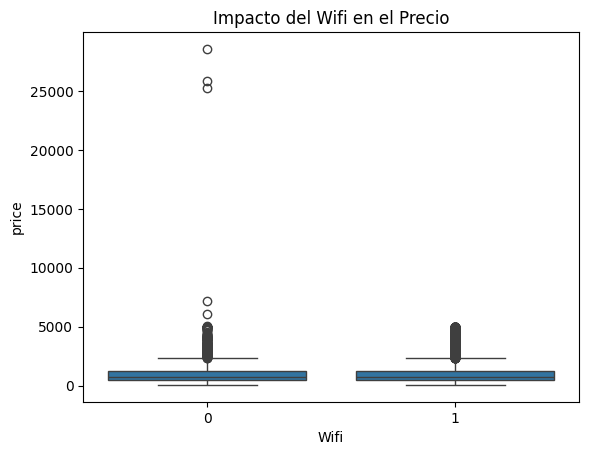

In [129]:
# Comparar el Precio según la Presencia de una Comodidad
sns.boxplot(x=df["Wifi"], y=df["price"])
plt.title("Impacto del Wifi en el Precio")
plt.show()



Este gráfico muestra el impacto de la presencia de WiFi (Wifi = 1) en el precio (price) comparado con alojamientos que no lo tienen (Wifi = 0).
Distribución Similar. Los precios medianos de los alojamientos con y sin WiFi parecen similares.
No parece haber una diferencia clara entre los precios según la presencia de WiFi.
Outliers Extremos

### Relación entre Capacidad (accommodates) y Precio

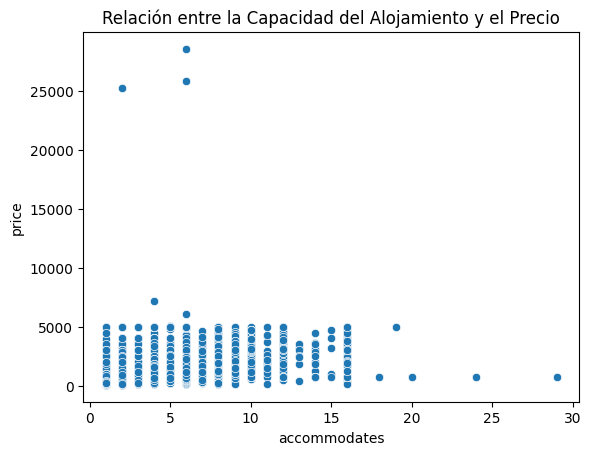

In [130]:
sns.scatterplot(x=df["accommodates"], y=df["price"])
plt.title("Relación entre la Capacidad del Alojamiento y el Precio")
plt.show()


Este gráfico muestra la relación entre la capacidad del alojamiento (accommodates) y el precio (price).

Observaciones Claves
Tendencia esperada: mayor capacidad, mayor precio

En general, los alojamientos con más capacidad tienden a tener precios más altos.
Sin embargo, hay mucha variabilidad en los precios dentro de cada nivel de capacidad.

Presencia de Outliers: Se observan precios extremadamente altos (más de 25,000) para alojamientos con capacidad baja y media.. A partir de 15 personas, hay muy pocos alojamientos, lo que dificulta la identificación de una tendencia clara en esa zona.

In [131]:
correlacion_capacidad = df[["accommodates", "price"]].corr()
print(correlacion_capacidad)


              accommodates     price
accommodates      1.000000  0.491137
price             0.491137  1.000000


In [132]:
### una vez el dataset esté correcto, mirar los resultados nuevamente de la correlación

### Relación entre review_scores_location y Precio

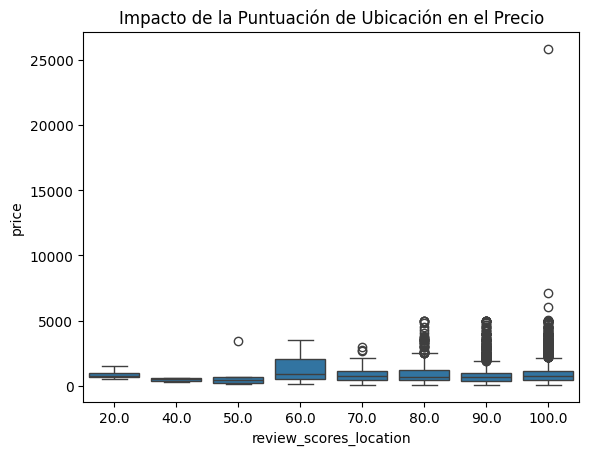

In [133]:
sns.boxplot(x=df["review_scores_location"], y=df["price"])
plt.title("Impacto de la Puntuación de Ubicación en el Precio")
plt.show()


El boxplot muestra la relación entre la puntuación de ubicación (review_scores_location) y el precio (price). Aquí algunas observaciones clave:

Distribución del Precio por Puntuación
Los precios están generalmente concentrados en valores bajos, pero hay outliers (puntos extremos) en precios altos.
La mediana del precio no varía drásticamente entre diferentes puntuaciones de ubicación.
Presencia de Outliers

Se observan valores extremadamente altos en casi todas las puntuaciones, especialmente en 100.0, donde hay precios que superan los 25,000.
Esto sugiere que algunos alojamientos con puntuaciones altas pueden ser lujosos o casos atípicos.
Tendencia General

No parece haber una relación fuerte entre la puntuación de ubicación y el precio.
Aunque los precios más altos aparecen en 100.0, la mayoría de los valores parecen mantenerse dentro de un rango similar en todas las puntuaciones.

Comparar precios promedio por ciudad para entender cómo varían los precios entre ciudades

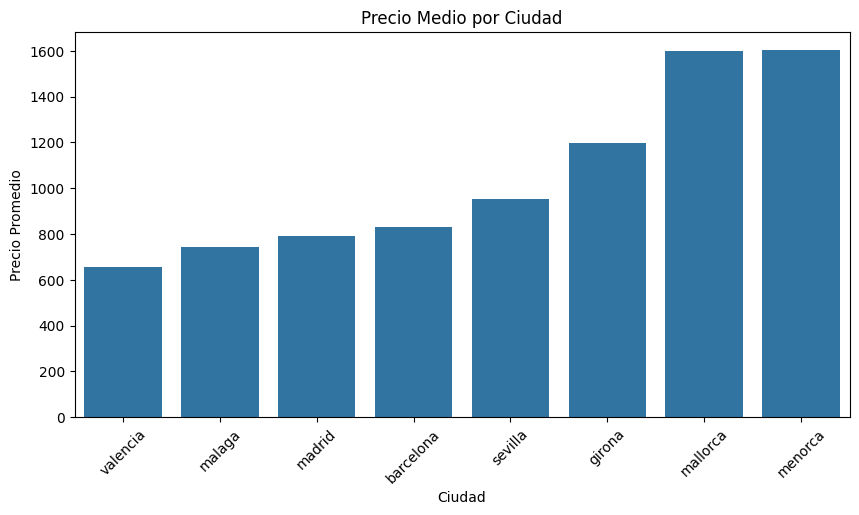

In [ ]:
df_ciudades = df.groupby("city")["price"].mean().sort_values()

# Graficar
plt.figure(figsize=(10,5))
sns.barplot(x=df_ciudades.index, y=df_ciudades.values)
plt.xticks(rotation=45)
plt.title("Precio Medio por Ciudad")
plt.ylabel("Precio Promedio")
plt.xlabel("Ciudad")
plt.show()


Análisis del Gráfico (Barplot)
Este gráfico muestra el precio medio por ciudad, permitiendo comparar cómo varían los costos de alojamiento entre diferentes ubicaciones.

Observaciones Claves
Ciudades con precios más altos

Mallorca y Menorca tienen los precios más altos, con promedios alrededor de 1,600.
Esto puede deberse a que son destinos turísticos con una alta demanda, especialmente en temporada alta.
Ciudades con precios más bajos

Valencia, Málaga y Madrid tienen los precios medios más bajos, en el rango de 600 a 800.
Esto podría estar relacionado con una mayor oferta de alojamientos o una menor demanda relativa.
Tendencia progresiva

Se observa un incremento gradual de los precios desde ciudades como Valencia y Málaga hasta los destinos más costosos en las islas Baleares.

In [140]:
# Analizar la cantidad de alojamientos por ciudad
# Para ver si el precio medio está influenciado por una baja cantidad de anuncios en ciertas ciudades:
df_ciudades_count = df["city"].value_counts()
print(df_ciudades_count)


city
barcelona    2825
madrid       2202
mallorca     1644
girona       1533
valencia      528
sevilla       524
malaga        520
menorca       224
Name: count, dtype: int64


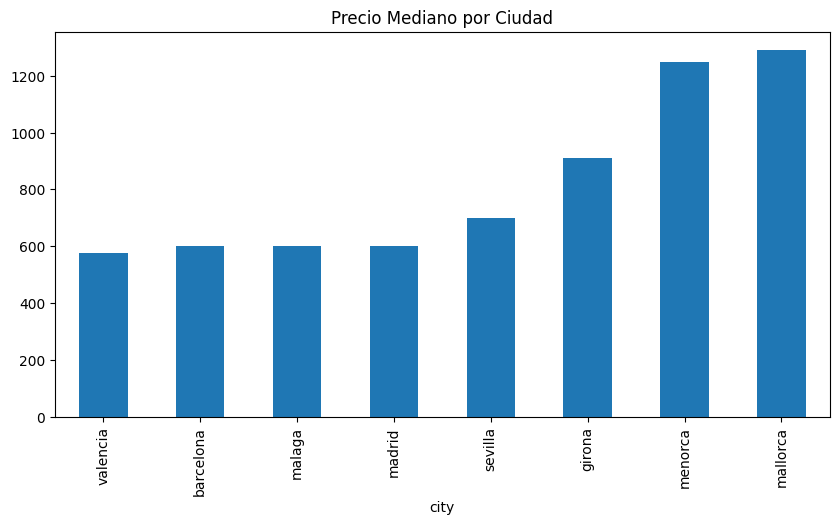

In [141]:
# Comparar los precios medianos en lugar de la media
# La media puede verse afectada por outliers, por lo que la mediana puede ser más representativa:
df_ciudades_median = df.groupby("city")["price"].median().sort_values()
df_ciudades_median.plot(kind="bar", figsize=(10,5), title="Precio Mediano por Ciudad")
plt.show()


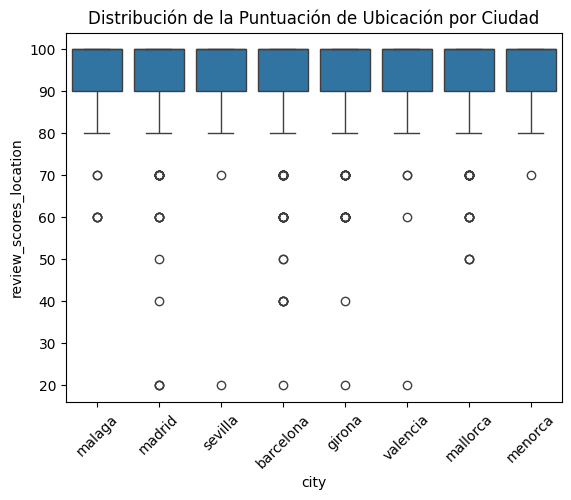

In [142]:
#Evaluar la relación entre precio y puntuación de ubicación (review_scores_location) por ciudad
sns.boxplot(x="city", y="review_scores_location", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de la Puntuación de Ubicación por Ciudad")
plt.show()


Observaciones Claves
Distribución Similar en Todas las Ciudades

La mayoría de las ciudades tienen puntuaciones de ubicación muy altas, con valores concentrados entre 90 y 100.
La mediana en todas las ciudades parece estar cercana a 100, lo que sugiere que en general los huéspedes están satisfechos con la ubicación de los alojamientos.
Presencia de Outliers

Se observan puntuaciones bajas (20-70) en todas las ciudades, representadas como puntos fuera de las cajas.
Estos valores podrían deberse a alojamientos ubicados en zonas menos accesibles o alejadas del centro.
Baja Variabilidad

La mayoría de las ciudades tienen distribuciones muy compactas entre 90 y 100, lo que indica que casi todos los alojamientos reciben una buena puntuación en ubicación.
No parece haber diferencias significativas entre ciudades en cuanto a la calidad de la ubicación percibida por los huéspedes.

Ver relación de review_scores_location y price por ciudad, y si la puntuación de ubicación afecta el precio en algunas ciudades más que en otras

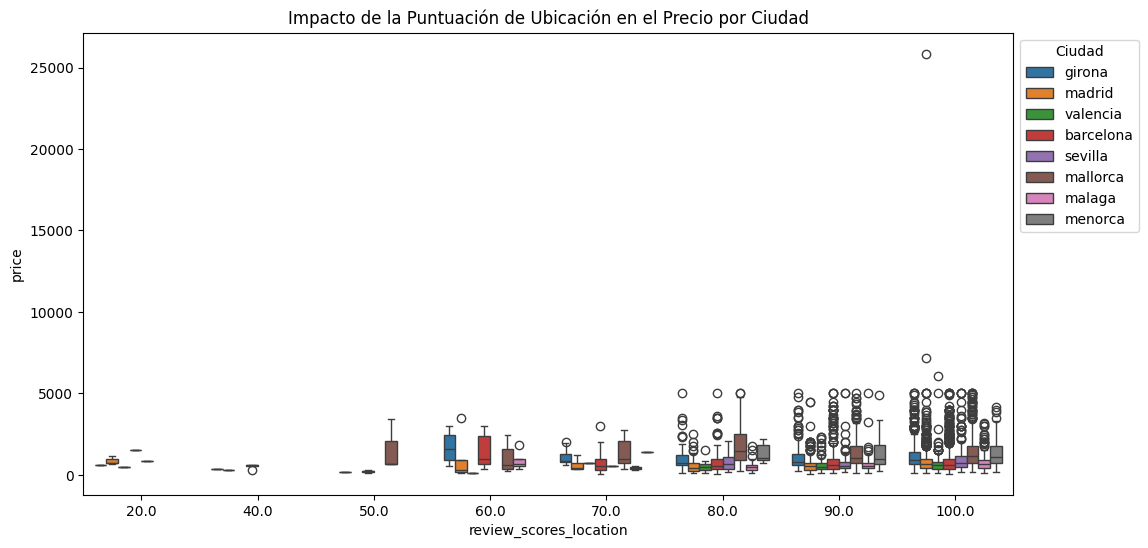

In [135]:
plt.figure(figsize=(12,6))
sns.boxplot(x="review_scores_location", y="price", hue="city", data=df)
plt.title("Impacto de la Puntuación de Ubicación en el Precio por Ciudad")
plt.legend(title="Ciudad", bbox_to_anchor=(1,1))
plt.show()


Evaluar la capacidad (accommodates) en cada ciudad nos permitirá ver si la capacidad de huéspedes afecta el precio de forma diferente según la ciudad.

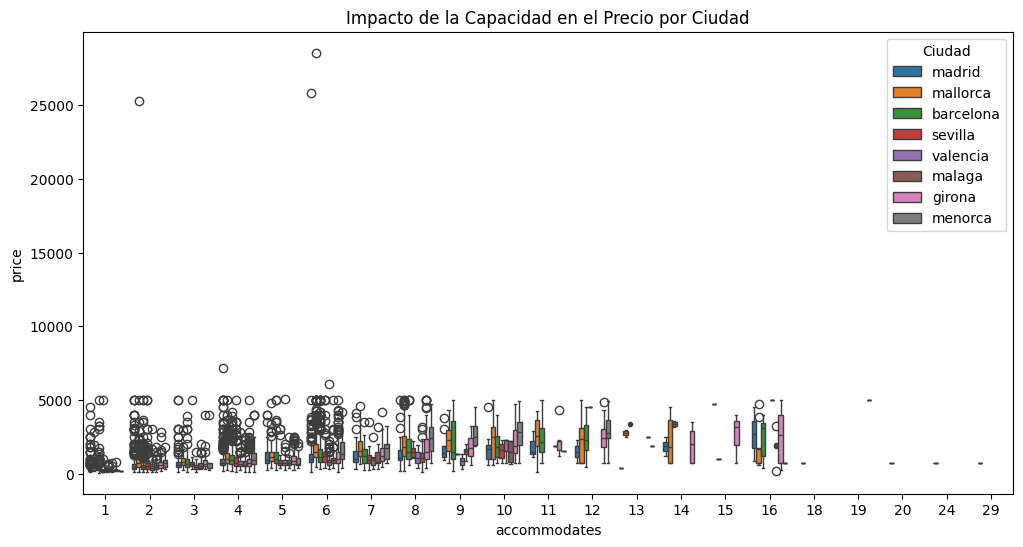

In [136]:
plt.figure(figsize=(12,6))
sns.boxplot(x="accommodates", y="price", hue="city", data=df)
plt.title("Impacto de la Capacidad en el Precio por Ciudad")
plt.legend(title="Ciudad", bbox_to_anchor=(1,1))
plt.show()


Evaluar comodidades (amenities_list) por ciudad si queremos ver qué comodidades son más frecuentes en cada ciudad

In [137]:
from collections import Counter

# Contar comodidades más usadas por ciudad
comodidades_por_ciudad = df.groupby("city")["amenities_list"].sum().apply(lambda x: Counter(x).most_common(5))

# Mostrar las comodidades más comunes en cada ciudad
print(comodidades_por_ciudad)


city
barcelona      [(Essentials, 2256), (Kitchen, 2170), (Washer, 1863), (Hangers, 1838), (Heating, 1808)]
girona       [(TV, 1305), (Kitchen, 1273), (Washer, 1164), (Hangers, 973), (Family/kid friendly, 940)]
madrid            [(Essentials, 1679), (Kitchen, 1630), (Wifi, 1579), (Heating, 1575), (Washer, 1533)]
malaga                      [(Essentials, 425), (Kitchen, 425), (TV, 409), (Wifi, 406), (Washer, 392)]
mallorca               [(TV, 1223), (Kitchen, 1222), (Washer, 1181), (Essentials, 1172), (Wifi, 1153)]
menorca                     [(Kitchen, 184), (Washer, 170), (Essentials, 167), (TV, 165), (Wifi, 144)]
sevilla           [(Essentials, 432), (Wifi, 431), (Hangers, 419), (Air conditioning, 413), (TV, 407)]
valencia               [(Essentials, 372), (Wifi, 350), (Kitchen, 340), (Washer, 336), (Hangers, 314)]
Name: amenities_list, dtype: object


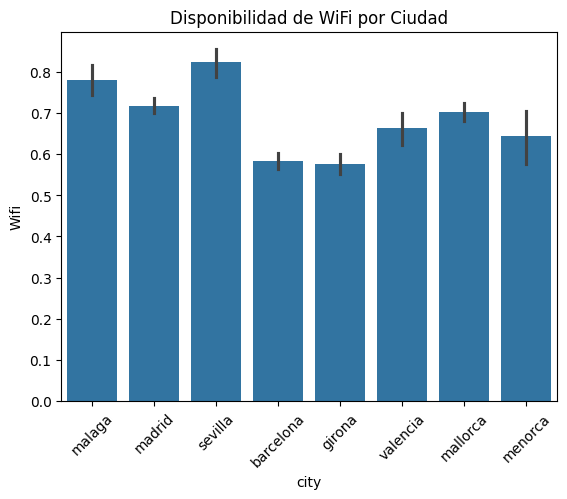

In [138]:
sns.barplot(x="city", y="Wifi", data=df)
plt.title("Disponibilidad de WiFi por Ciudad")
plt.xticks(rotation=45)
plt.show()


Sara